<a href="https://colab.research.google.com/github/IqraAziz15/OpenRestaurantFYP/blob/master/ReviewsClassifier/model/ReviewsClassifierModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SEMENTIC ANALYSIS MODEL USING NLTK**

In [135]:
import numpy as np # scientific computation
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # Visualization
import nltk  # Preprocessing Reviews
nltk.download('stopwords') #Downloading stopwords
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of words
import re  # To use Regular expression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#importing dataset from local system
from google.colab import files
uploaded = files.upload() 

Saving Food_Reviews.csv to Food_Reviews.csv
Saving Restaurant_Reviews.csv to Restaurant_Reviews.csv
Saving Reviews.csv to Reviews.csv


In [125]:
uploaded = files.upload()

Saving Restaurant_Food_Reviews.csv to Restaurant_Food_Reviews (1).csv


In [127]:
#read data from uploaded files
#dataset1
dataset1 = pd.read_csv('Reviews.csv')
#dataset2
dataset2 = pd.read_csv('Food_Reviews.csv')
#dataset3
dataset3 = pd.read_csv('Restaurant_Reviews.csv')
#combined datasets
dataset = pd.read_csv('Restaurant_Food_Reviews (1).csv')

Printing Data Info

In [5]:
dataset1.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
dataset1.tail(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
219487,219972,B000FDKQBK,A3B7MD6W6XUAOM,"G Y ""GY WY""",1,2,5,1257033600,Flax is great Omega3,Amazon is always great to order from. Hodgson...
219488,219973,B000FDKQBK,A2PA9Z65V5ME75,"M. Fatima Muhammad ""doggone skater 550""",0,1,4,1326067200,Good Health Search,I bought this item to assist my own health ove...
219489,219974,B000FDKQBK,A26XFG2AAD3UMD,jo,0,1,5,1305676800,Hodgson Mill Milled Flax Seed,Hodgson Mill Milled Flax Seed was received pro...
219490,219975,B000FDKQBK,A2QYA3WQYE2YLE,Sparkey,0,1,5,1292976000,Flax Seed is as advertised,Very satisfied with the product. I use a lot ...
219491,219976,B000FDKQBK,A2VMFY1OXZH6K3,S. Surles,0,2,4,1278028800,Excellent Price and Great Product,The price was excellent. Much less than at the...


In [29]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219492 entries, 0 to 219491
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      219492 non-null  int64 
 1   ProductId               219492 non-null  object
 2   UserId                  219492 non-null  object
 3   ProfileName             219484 non-null  object
 4   HelpfulnessNumerator    219492 non-null  int64 
 5   HelpfulnessDenominator  219492 non-null  int64 
 6   Score                   219492 non-null  int64 
 7   Time                    219492 non-null  int64 
 8   Summary                 219483 non-null  object
 9   Text                    219492 non-null  object
 10  y                       219492 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 18.4+ MB


In [28]:
dataset2.head(5)

,Text,y,Source,Restaurant,Unnamed: 4
0,Thoroughly enjoyed food and place. Very good t...,1.0,Google,Roasters,NaN
1,The ambience of the place was good. The menu h...,1.0,Google,Roasters,NaN
2,Loved the food! The quality was top notch and ...,1.0,Google,Roasters,NaN
3,Great burgers by jessie's,1.0,Facebook,Jessies,NaN
4,sauce and mashed potatoes are very less in qua...,0.0,Facebook,Jessies,NaN


In [9]:
dataset2.tail(5)

,Text,y,Source,Restaurant,Unnamed: 4
131,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Text        61 non-null     object 
 1   y           61 non-null     float64
 2   Source      31 non-null     object 
 3   Restaurant  39 non-null     object 
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 5.4+ KB


In [11]:
dataset3.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [31]:
dataset3.tail(5)

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [32]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1061 non-null   object
 1   Liked   1061 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


In [129]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1056,he view on the drive here was beautiful and we...,0
1057,Great service provided. Food quality good as a...,1
1058,The most expensive in Islamabad with double ta...,0
1059,Ordered Pakistani omelette and chicken sausage...,1


In [27]:
#As dataset1 has null values, so will first drop null values
dataset1.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,y
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...,...,...,...,...,...,...,...,...
219487,219972,B000FDKQBK,A3B7MD6W6XUAOM,"G Y ""GY WY""",1,2,5,1257033600,Flax is great Omega3,Amazon is always great to order from. Hodgson...,1
219488,219973,B000FDKQBK,A2PA9Z65V5ME75,"M. Fatima Muhammad ""doggone skater 550""",0,1,4,1326067200,Good Health Search,I bought this item to assist my own health ove...,1
219489,219974,B000FDKQBK,A26XFG2AAD3UMD,jo,0,1,5,1305676800,Hodgson Mill Milled Flax Seed,Hodgson Mill Milled Flax Seed was received pro...,1
219490,219975,B000FDKQBK,A2QYA3WQYE2YLE,Sparkey,0,1,5,1292976000,Flax Seed is as advertised,Very satisfied with the product. I use a lot ...,1


In [51]:
#As dataset1 does not have any y column, so we add y column using score values
dataset1['y']= dataset1.Score
dataset1.y[dataset1.Score <= 3] = 0 #Because we are only classifying in two classes so will add normal score in bad reviews category
dataset1.y[dataset1.Score >  3] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
#changing columns names for dataset3
dataset3.rename(columns={'Review':'Text',
                          'Liked':'y'}, 
                 inplace=True)
# dataset3.head()

In [40]:
#changing type of Text column to string
dataset1['Text']= dataset1['Text'].astype(str)
dataset2['Text']= dataset2['Text'].astype(str)
dataset3['Text']= dataset3['Text'].astype(str)

In [41]:
#As there are some empty rows in dataset2, we will remove them first
dataset2 = dataset2.iloc[:61, :]

In [42]:
#Now changing its y column to int type
dataset2['y'] = dataset2['y'].astype(int)

In [45]:
#Visual Representation of datasets
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


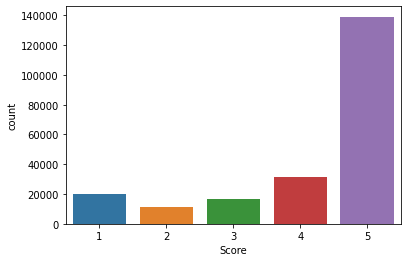

In [46]:
sb.countplot('Score',data=dataset1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


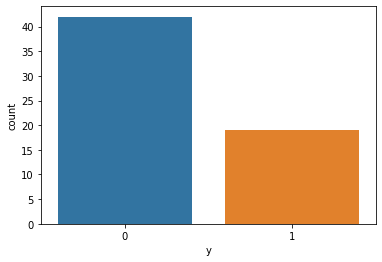

In [47]:
sb.countplot('y',data=dataset2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


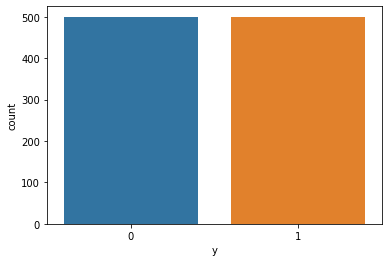

In [48]:
sb.countplot('y',data=dataset3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


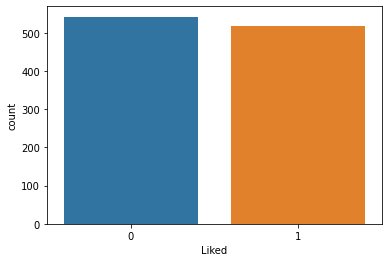

In [131]:
sb.countplot('Liked',data=dataset)

Now, Merging data in the form of separate frames for X and y, So we only have one dataset to work on.

###Cleaning

In [138]:
#dataset2 cleaning
corpus = []
for i in range(0, 1061):   #we have 1000 reviews
     review = re.sub('[^a-zA-Z]'," ",dataset['Review'][i])
     review = review.lower()
     review = review.split()
     pe = PorterStemmer()
     all_stopword = stopwords.words('english')
     all_stopword.remove('not')
     review = [pe.stem(word) for word in review if not word in set(all_stopword)]
     review = " ".join(review)
     corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'name', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not happier', 'seem li

###Count Vectorior

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(corpus).toarray()
y = dataset["Liked"]

###Splitting Data

In [140]:
X_train, X_test, y_train, y_test = train_test_split( 
           X, y, test_size = 0.25, random_state = 5)

In [141]:
X_train.shape, y_train.shape

((795, 1500), (795,))

In [142]:
X_test.shape, y_test.shape

((266, 1500), (266,))

In [143]:
logreg = LogisticRegression(max_iter=700)

In [144]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_prediction = logreg.predict(X_test)

In [147]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_prediction)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_prediction)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_prediction)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_prediction, average='micro')))

Accuracy score: 0.77
Precision score: 0.78
Recall score: 0.74
F1 score: 0.77


###Downloading Model and Count Vectorizer

In [148]:
from google.colab import files

# save file in colab environment
joblib.dump(logreg, 'review_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# download to local machine
files.download('review_classifier_model.pkl')
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Testing

In [156]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in  set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = vectorizer.transform(new_corpus).toarray()
  new_y_pred = logreg.predict(new_X_test)
  return new_y_pred

In [155]:
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
   print("Positive")
else :
   print("Negative")

Enter new review...distasteful food
(1, 1500)
Negative
